# ASSIGNMENT - Final

#           AI LAB ASSIGNEMENT

## FINAL ASSIGNMENT: SEARCHES & ML
____________________________________
###   NAME:     GHULAM MUSTAFA
###   ROLL:     Fa-2022/BSCS/188
###   SECTION:  E

____________

### TASK 1: Python Mid-Level Logic – Functional Programming
Write a Python program that:
- Accepts a list of words from the user.
- Identifies all words that are palindromes and whose length is a prime number.
- Use at least two functions: one to check for palindrome and one for prime length.
- Display the final list and the total count of such words.

____________

        IS PALINDROME Function

In [1]:
def is_palindrome(word):
    for i in range(int(len(word)/2)):
        if(word[i] != word[len(word)-i-1]):
            return False
    return True

        IS ODD LENGTH Function

In [2]:
def is_odd_length(word):
    return int(len(word))%2 == 1

        USAGE

In [3]:
words = []
count = 0

while True:
    word = input("Enter a word (or 'exit' to finish): ")
    if word.lower() == 'exit':
        break]
    words.append(word)

for word in words:
    if is_palindrome(word) and is_odd_length(word):
        count+=1
print("List of Words:   ",words)
print("Number of odd-length palindromes:", count)



List of Words:    ['cat', 'dog', 'gog', 'magog', 'mom', 'dad', 'real', 'shoosh', 'yay', 'hehe', 'very', 'reallaer']
Number of odd-length palindromes: 4


____________________________

### TASK 2: BFS Graph Traversal

1. Represent the above graph using an adjacency list (dictionary) in Python.
2. Implement a Breadth-First Search (BFS) function to traverse the graph starting from node
3. Output the order in which nodes are visited.
4. Indicate if node F is reachable from node A.

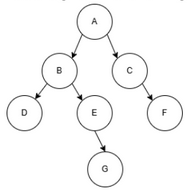

__________

We'll need deque for this beacuse we'll be usnig a queue

In [4]:
from collections import deque

        BFS FUNCTION:

In [5]:
def bfs(graph,start,end):
    if start not in graph or end not in graph:
        print("Specified Start or End is not in the graph")
        return
    
    queue = [start]
    visited = set()
    while queue:
        node = queue.pop(0)
        if node == end:
            print(node, end=' ')
            print(f"Path found from {start} to {end}.")
            return
        if node not in visited:
            visited.add(node)
            print(node, end='->')
            for neighbor in graph[node]:
                if neighbor not in visited and neighbor not in queue:
                    queue.append(neighbor)
    print(f"No path found from {start} to {end}.")


        GIVEN GRAPH CAN BE REPRESENTED AS:

In [6]:
graph = {
    'A': ['B', 'C'],
    'B': ['A','D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'G'],
    'F': ['C'],
    'G': ['E']
}

        CALLING THE FUNCTION

In [7]:
bfs(graph, 'A', 'G')

A->B->C->D->E->F->G Path found from A to G.


        Indicate if node F is reachable from node A?

###      YES

____________

### TASK 3: Data Preprocessing – Classification Dataset

- Handle all missing values appropriately.
- Encode categorical features.
- Scale numerical features if needed.
- Show the cleaned DataFrame (head or sample).

____________

In [80]:
import pandas as pd
import numpy as np

#### Given Dataset:

In [106]:
data = pd.read_csv('loan.csv')

In [107]:
data.head()

,Applicant_ID,Age,Gender,Income,Employment_Type,Credit_Score,Loan_Amount,Marital_Status,Property_Area,Loan_Approved
0,A001,28.0,Male,50000.0,Salaried,700.0,200000.0,Married,Urban,Yes
1,A002,35.0,Female,60000.0,Self-Employed,NaN,250000.0,Single,Semiurban,No
2,A003,NaN,Male,45000.0,Salaried,690.0,NaN,Married,Rural,Yes
3,A004,40.0,Female,NaN,NaN,720.0,180000.0,NaN,Urban,No
4,A005,30.0,Male,48000.0,Salaried,710.0,190000.0,Single,NaN,Yes


___________

### DATA PRE PROCESSING

##### Check Missing Values

In [108]:
data.isnull().sum()

Applicant_ID       0
Age                1
Gender             0
Income             1
Employment_Type    1
Credit_Score       1
Loan_Amount        1
Marital_Status     1
Property_Area      1
Loan_Approved      0
dtype: int64

#### HANDLING MISSING VALUES

         Fill numerical columns with median

In [109]:
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Income"].fillna(data["Income"].median(), inplace=True)
data["Credit_Score"].fillna(data["Credit_Score"].median(), inplace=True)
data["Loan_Amount"].fillna(data["Loan_Amount"].median(), inplace=True)

/tmp/ipykernel_69725/1157600402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipykernel_69725/1157600402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

        Fill categorical columns with mode

In [110]:
data["Employment_Type"].fillna(data["Employment_Type"].mode()[0], inplace=True)
data["Marital_Status"].fillna(data["Marital_Status"].mode()[0], inplace=True)
data["Property_Area"].fillna(data["Property_Area"].mode()[0], inplace=True)

/tmp/ipykernel_69725/1811783195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Employment_Type"].fillna(data["Employment_Type"].mode()[0], inplace=True)
/tmp/ipykernel_69725/1811783195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [111]:
data.isnull().sum()

Applicant_ID       0
Age                0
Gender             0
Income             0
Employment_Type    0
Credit_Score       0
Loan_Amount        0
Marital_Status     0
Property_Area      0
Loan_Approved      0
dtype: int64

In [112]:
data.head()

,Applicant_ID,Age,Gender,Income,Employment_Type,Credit_Score,Loan_Amount,Marital_Status,Property_Area,Loan_Approved
0,A001,28.0,Male,50000.0,Salaried,700.0,200000.0,Married,Urban,Yes
1,A002,35.0,Female,60000.0,Self-Employed,705.0,250000.0,Single,Semiurban,No
2,A003,32.5,Male,45000.0,Salaried,690.0,195000.0,Married,Rural,Yes
3,A004,40.0,Female,49000.0,Salaried,720.0,180000.0,Married,Urban,No
4,A005,30.0,Male,48000.0,Salaried,710.0,190000.0,Single,Urban,Yes


HANDLED ALL MISSING VALUES

##### Encode Categorical Features

- Label Encoding for binary columns  - Loan_Approved
- One-Hot Encoding for other categorical features

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_encoder = LabelEncoder()

In [115]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])  
data['Loan_Approved'] = label_encoder.fit_transform(data['Loan_Approved']) 
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data = pd.get_dummies(data, columns=['Property_Area', 'Employment_Type'], drop_first=False)

In [116]:
data.head()

,Applicant_ID,Age,Gender,Income,Credit_Score,Loan_Amount,Marital_Status,Loan_Approved,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Employment_Type_Salaried,Employment_Type_Self-Employed
0,A001,28.0,1,50000.0,700.0,200000.0,0,1,False,False,True,True,False
1,A002,35.0,0,60000.0,705.0,250000.0,1,0,False,True,False,False,True
2,A003,32.5,1,45000.0,690.0,195000.0,0,1,True,False,False,True,False
3,A004,40.0,0,49000.0,720.0,180000.0,0,0,False,False,True,True,False
4,A005,30.0,1,48000.0,710.0,190000.0,1,1,False,False,True,True,False


We dont need applicant id tbh

In [117]:
data.drop(['Applicant_ID'], axis=1, inplace=True)

In [118]:
data.head()

,Age,Gender,Income,Credit_Score,Loan_Amount,Marital_Status,Loan_Approved,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Employment_Type_Salaried,Employment_Type_Self-Employed
0,28.0,1,50000.0,700.0,200000.0,0,1,False,False,True,True,False
1,35.0,0,60000.0,705.0,250000.0,1,0,False,True,False,False,True
2,32.5,1,45000.0,690.0,195000.0,0,1,True,False,False,True,False
3,40.0,0,49000.0,720.0,180000.0,0,0,False,False,True,True,False
4,30.0,1,48000.0,710.0,190000.0,1,1,False,False,True,True,False


### i will do Data Scaling after data splitting coz its simpler

___________

### Task 4: Model Implementation & Evaluation
Using the preprocessed loan approval dataset from Question 3:
1. Select a suitable classification model and justify your choice.
2. Split the dataset into training and testing sets.
3. Train the model and make predictions.
4. Evaluate the model using at least 3 techniques such as:
- Accuracy
- Precision / Recall
- Confusion Matrix
- F1-score

Provide proper code snippets and a brief explanation of your results.

___________________

#### Model Selection & Justification:

For binary classification (Loan Approved: Yes/No)
hum we'll use a Logistic Regression model sir coz:
- its simple and interpretable
- works well when the classes are linearly separable
- performs well on small datasets like in the assignment

        imports

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Data Splitting

In [120]:
X = data.drop(['Loan_Approved'], axis=1)
y = data['Loan_Approved']

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Data Scaling

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

        Call Model

In [125]:
model = LogisticRegression()

        FIt the scaled data

In [126]:
model.fit(X_train, y_train)

LogisticRegression()

        Make Predictions

In [127]:
y_pred = model.predict(X_test)

#### Model Performance Evaluation

In [128]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=1)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [129]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 1]]


_______

but since the dataset was really small only 5 rows 💀, the model didnt have much to learn. It ended up predicting all test values as "Loan Approved", which gave:
- Accuracy: 0.5
- Precision: 0.5
- Recall: 1.0
- F1 Score: 0.6666666666666666
- Confusion Matrix:
            [[0 1]
            [0 1]]

so yeah sir technically the model works fine the training, prediction, and evaluation all completed but the results are kinda messeddd upp coz of the tiny  dataset... With a bigger and more balanced dataset, the model would definitely perform better and give more meaningful results